# <font color=#104E8B>Student ID, name of each team member<font>

> 108062633 石育瑋<br /> 108065508 田仲軒<br /> 108062545 林怡君<br /> 108064546 許溦芳

# <font color=#104E8B>How did you preprocess data (cleaning, feature engineering, etc)?<font>

# <mark><font size=5>Preprocessing<font><mark>
### *Data Cleaning*
> 資料中有很多HTML的標籤、標點等等，由於我們只關心語意，所以把HTML標籤跟標點符號都刪除。除此之外，我們還把所有文本都轉換成小寫，因為語意跟大寫還是小寫沒有太大的影響，所以通常我們會忽略它。如此一來我們就能得到一個乾淨的文本<br />故在Data Cleaning的這個步驟我們做了:
> 1. 清除所有HTML標記<br /> (使用HTML解析工具BeautifulSoup4做處理)
> 2. 清除標點符號
> 3. 全部換成小寫
### *Tokenization*
> 這個動作是把清理過後的句子拆成一個個的單字，但是處理過後會發現，有些字只是時態不同或是不同變化相同的字，卻被分為不同的token。<br /> 所以我們會合併使用Word Stemmimg，把字還原到字根的型態。<br /> 因為我們的資料是英文文本，所以這裡我們的操作方式是把經過data cleaning的文本依照空白字元拆成一個一個的單字   
### *Word Stemmimg*
> Word Stemmimg是把一個字轉換成字根的形式，也就是要找到詞的原始形式，並且把相關的詞對應到同一個詞幹。<br /> 這裡我們直接用NLTK裡的Porter stemming algorithm去做Word Stemmimg
### *Stop-Word Removal*
> Stop-words是在各個文本中經常出現的字，它擁有的有用資訊非常少。(在英文文本中，例如:'is'，'am'，'the'，'of'，'in'等等)<br /> 去掉它們以後對理解整個句子的語意沒有影響，因此我們把Stop-Word移除<br /> 使用NLTK中提供的英文Stop-Word的表去刪除Stop-word
# <mark><font size=5>Feature Extraction<font><mark>
### *Title*
> + 標題的總字數
> + 標題的情感
### *Article*
> + 連結數
> + topic的數量
> + 圖片的數量
> + 影片的數量
> + timedelta<br /> (文章發佈至今經過的天數)
> + 一篇文章裡面句子的數量
> + 文章中的字數<br /> (這部分分成兩個features，一個是文章的總字數，另一個則是文章中不同的字的總數)
> + LDA<br /> (先把文本分詞，接著把stop-word移除掉，然後再把文本中的詞變成向量的形式，這樣就可以開始做LDA分析了。用sklearn.decomposition.LatentDirichletAllocation去做LDA，我們把n_topics設定為5，所以做完LDA輸出的結果就是一個文本它屬於這5個topics的機率)
### *Sentiment analysis*
> 使用TextBlob進行情感分析，會傳回兩個分數，分別是polarity跟subjectivity
> + 情感極性(polarity分數的變化範圍介於[-1.0,1.0]，負數表示消極，正數表示積極)
> + 主觀性(subjectivity分數的範圍介於[0.0,1.0]，0表示客觀的，1表示為主觀的)
>    
> 我們對title跟article都做情感分析，所以會得到四個features
### *Channel*
> 文章的類別有以下這些
> + world
> + technology
> + entertainment
> + watercooler
> + business
> + social_media
>
> 我們對它做one hot encoding，把這些沒有順序關係的類別拆成多行，每列中的類別用0/1表示，而不是把每個類別mapping到某個整數
### *Others*
> + 文章在星期幾發佈<br /> (使用data.isoweekday()得到weekday，如果是星期一，返回1；如果是星期2，返回2...依此類推)

# <font color=#104E8B>How did you build the classifier (model, training algorithm, special techniques, etc.)?<font>

### *K-Fold Cross Validation*
> 某些情況下單純的直接從資料集裡面切一塊出來當驗證集，沒有辦法很有效的去評量一個Model訓練的好壞，所以我們使用K-fold Cross-Validation 的交叉驗證方法來做驗證。K指的是一個數字，一個可以由使用者訂定的數字，顧名思義就是將資料集拆分成K份做交叉驗證。也就是將其中K-1 份的資料當作訓練集，剩下來的那份做為驗證集，算出一個Validation Error，接著再從沒當過驗證集的資料挑一份出來當驗證集，剛剛做過驗證集的資料則加回訓練集，維持K-1份做訓練、1份做驗證，如此反覆直到每一份資料都當過驗證集，這樣會執行K次，算出K個Validation Error，最後我們再將這K個validation Error做平均，用他們的平均分數來做為我們評斷模型好壞的指標。
> + 在這次所有的模型中，我們把K設定為5

### *Decision Tree*
> Decision trees是用來處理分類問題的樹狀結構，它的特點是每個決策階段都相當明確清楚（不是YES就是NO），但是決策樹這個方法很容易產生Overfitting的問題，我們如果沒有對樹的成長作限制，演算法最後就會為每個不同特徵值創建新的分類節點，最後將所有資料做到百分之百正確的分類。
> + 這裡我們分別測試了max_depth=[3,4,5,8]

### *Bagging*
> Bagging是通過組合隨機生成的訓練集而改進分類的ensemble method，Bagging每次訓練數據時只使用訓練集中的某個子集作為當前訓練集，每個訓練樣本在訓練集中可以多次或不出現。<br /> 主要可以分成:
> 1. 從原始樣本集中抽取訓練集，每輪從原始樣本集中使用Bootstraping（抽出放回）的方法抽取n個訓練樣本。共進行k輪抽取，得到k個訓練集。
> 2. 每次使用一個訓練集得到一個模型，k個訓練集共得到k個模型。但是是同種模型。
> 3. 當問題是分類問題時，將上個步驟得到的k個模型採用投票的方式得到分類結果。

### *Random forest*
> Random Forest的基本原理是結合多顆CART樹（CART樹為使用GINI算法的決策樹），並加入隨機分配的訓練資料，以大幅增進最終的運算結果。<br /> 步驟如下:
> 1. 使用Bagging演算法從樣本集中抽出訓練資料
> 2. 對每個訓練資料集，生成不同的隨機向量，隨機選擇 m 的變數，對其中每個變數都嘗試分割，以選擇達到最小的Gini係數的分割方進行分裂，生成CART樹
> 3. 對這 n 顆樹的結果進行組合：若為分類資料，則用投票法得到結果。

> + 這裡我們分別測試了max_depth=[5,10,20]

# <font color=#104E8B>Conclusions (interesting findings, pitfalls, takeaway lessons, etc.)?<font>

+ 最後發現，在我們所有嘗試使用的方法中，用Bagging的方式，然後把decision tree的max_depth設定為5會得到最好的結果。

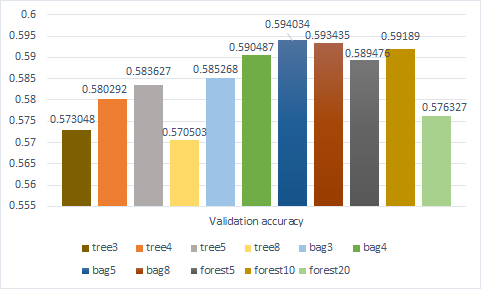